In [12]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Abordagem Clubes

In [6]:

arquivos_csv = [arquivo for arquivo in os.listdir() if arquivo.endswith('.csv')]

dados_clubes = pd.DataFrame()

for arquivo in arquivos_csv:
    dados = pd.read_csv(arquivo)
    dados = dados.dropna()

    df_grouped = dados.drop(columns=["Player"]).groupby(["Club", "Team"]).sum().reset_index()

    df_grouped.rename(columns={col: col + "_Pro" for col in ["G", "A", "RC", "YC", "Crn", "S", "SOnT", "BS", "P", "C", "Tk", "O", "FC", "FW"]}, inplace=True)

    df_grouped_against = df_grouped.copy()

    for col in ["G", "A", "RC", "YC", "Crn", "S", "SOnT", "BS", "P", "C", "Tk", "O", "FC", "FW"]:
        df_grouped_against[col + "_Against"] = df_grouped[col + "_Pro"].sum() - df_grouped[col + "_Pro"]

    columns_order = ["Club", "Team"] + [col + "_Pro" for col in ["G", "A", "RC", "YC", "Crn", "S", "SOnT", "BS", "P", "C", "Tk", "O", "FC", "FW"]] + [col + "_Against" for col in ["G", "A", "RC", "YC", "Crn", "S", "SOnT", "BS", "P", "C", "Tk", "O", "FC", "FW"]]
    df_grouped_against = df_grouped_against[columns_order]

    dados_clubes = pd.concat([dados_clubes, df_grouped_against], ignore_index=True)

dados_clubes.reset_index(drop=True, inplace=True)

dados_clubes.head(6)


,Club,Team,G_Pro,A_Pro,RC_Pro,YC_Pro,Crn_Pro,S_Pro,SOnT_Pro,BS_Pro,...,Crn_Against,S_Against,SOnT_Against,BS_Against,P_Against,C_Against,Tk_Against,O_Against,FC_Against,FW_Against
0,Crystal Palace FC,0.0,0,0,0,3,8,11,1,3,...,5,8,6,0,423,8,5,0,5,7
1,Newcastle United FC,1.0,3,2,0,1,5,8,6,0,...,8,11,1,3,262,11,16,1,11,5
2,Liverpool FC,0.0,1,1,0,1,9,19,2,9,...,2,7,2,2,274,10,19,2,11,10
3,Nottingham Forest FC,1.0,0,0,0,3,2,7,2,2,...,9,19,2,9,620,19,19,1,8,9
4,AFC Bournemouth,1.0,0,0,0,1,7,8,1,6,...,5,14,7,4,519,16,30,0,12,9
5,Liverpool FC,0.0,4,4,0,2,5,14,7,4,...,7,8,1,6,301,15,24,1,8,11


In [7]:
dados_clubes_pro = dados_clubes.iloc[:, :16]
dados_clubes_against = pd.concat([dados_clubes.iloc[:, :2], dados_clubes.iloc[:, -14:]], axis=1)

# Renomeando as colunas do dataframe dados_clubes_pro
dados_clubes_pro.columns = [col.replace('_Pro', '') for col in dados_clubes_pro.columns]

# Renomeando as colunas do dataframe dados_clubes_against
dados_clubes_against.columns = [col.replace('_Against', '') for col in dados_clubes_against.columns]


In [8]:
dados_clubes_pro

,Club,Team,G,A,RC,YC,Crn,S,SOnT,BS,P,C,Tk,O,FC,FW
0,Crystal Palace FC,0.0,0,0,0,3,8,11,1,3,262,11,16,1,11,5
1,Newcastle United FC,1.0,3,2,0,1,5,8,6,0,423,8,5,0,5,7
2,Liverpool FC,0.0,1,1,0,1,9,19,2,9,620,19,19,1,8,9
3,Nottingham Forest FC,1.0,0,0,0,3,2,7,2,2,274,10,19,2,11,10
4,AFC Bournemouth,1.0,0,0,0,1,7,8,1,6,301,15,24,1,8,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Liverpool FC,1.0,3,1,0,0,5,15,10,2,415,10,6,2,12,8
656,Brentford FC,0.0,0,0,0,1,3,9,4,2,384,20,19,1,13,13
657,Sheffield United FC,1.0,1,1,0,4,3,9,4,1,297,10,12,1,14,12
658,Sheffield United FC,0.0,1,1,1,4,1,6,5,1,182,5,18,3,9,7


In [9]:
def plot_media_por_clube(df, variable):
    # Calculando a média de cada indicador para cada clube, separando por Team = 0 e Team = 1
    media_por_clube = df.groupby(['Club', 'Team']).mean().unstack()

    # Plotando o gráfico de barras
    fig, ax = plt.subplots(figsize=(15, 8))

    # Definindo a largura das barras
    bar_width = 0.35

    # Definindo as posições das barras
    posicoes = range(len(media_por_clube))

    # Selecionando os dados para Team = 0
    media_team_0 = media_por_clube.loc[:, (variable, 0)].values

    # Selecionando os dados para Team = 1
    media_team_1 = media_por_clube.loc[:, (variable, 1)].values

    # Plotando as barras para Team = 0
    bars_team_0 = ax.bar(posicoes, media_team_0, bar_width, label=f'{variable} Team 0')

    # Plotando as barras para Team = 1
    bars_team_1 = ax.bar([p + bar_width for p in posicoes], media_team_1, bar_width, label=f'{variable} Team 1')

    # Adicionando rótulos de valor nas barras para Team = 0
    for bar in bars_team_0:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize = 8)

    # Adicionando rótulos de valor nas barras para Team = 1
    for bar in bars_team_1:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize = 8)

    # Definindo os rótulos do eixo x como os clubes
    ax.set_xticks([p + bar_width / 2 for p in posicoes])
    ax.set_xticklabels(media_por_clube.index)

    # Adicionando legendas, título e rótulos dos eixos
    ax.legend()
    ax.set_xlabel('Clube')
    ax.set_ylabel('Média')
    ax.set_title(f'Média de {variable} para cada clube, separado por Team')

    # Exibindo o gráfico
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


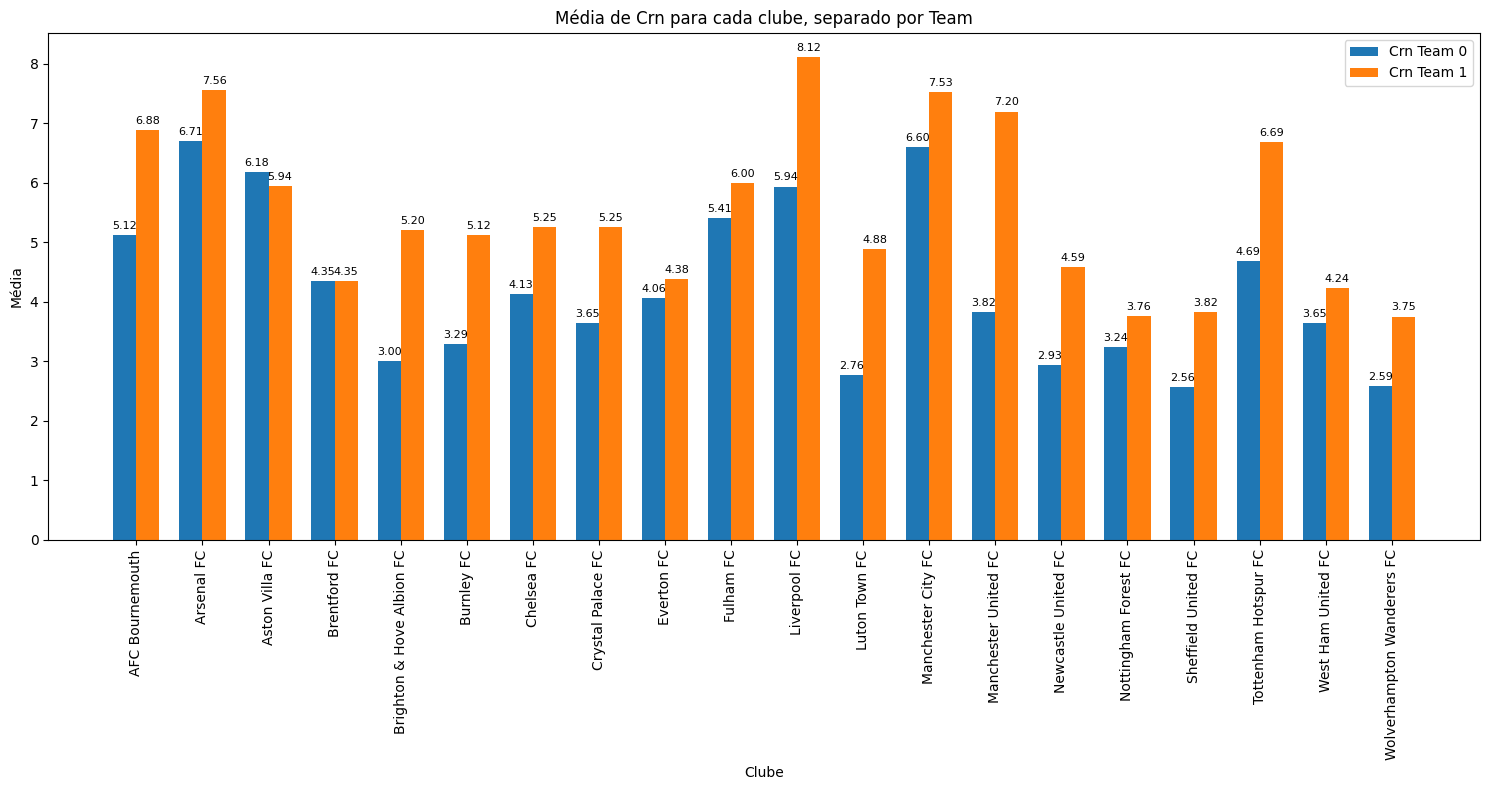

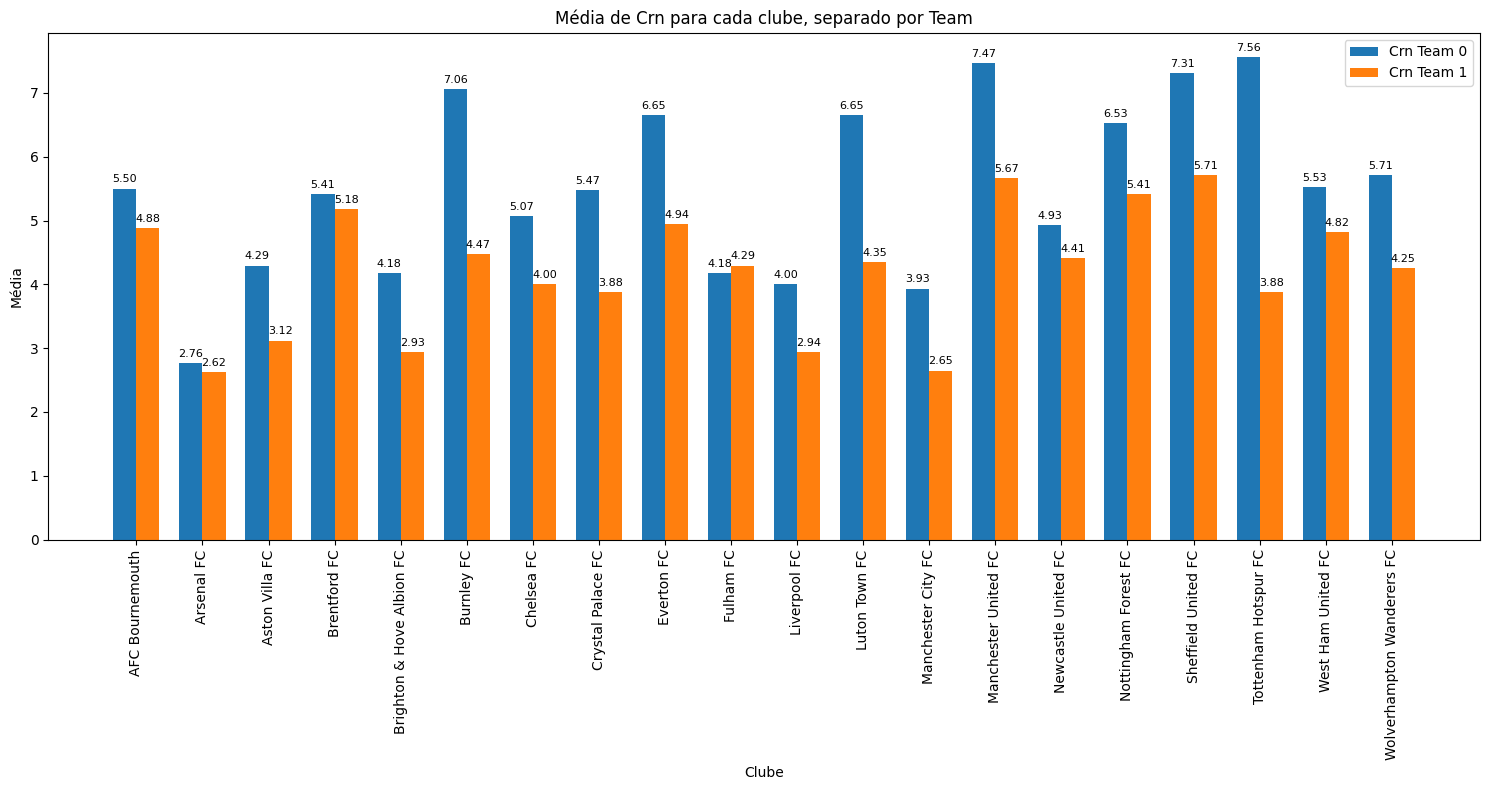

In [10]:
plot_media_por_clube(dados_clubes_pro, 'Crn')
plot_media_por_clube(dados_clubes_against, 'Crn')

In [23]:
def print_media_por_clubes(club1, club2):
    # Filtrando os dados para o primeiro clube e Team = 1
    media_club1_team1_pro = dados_clubes_pro.loc[(dados_clubes_pro['Club'] == club1) & (dados_clubes_pro['Team'] == 1), 'Crn'].mean()
    media_club1_team1_against = dados_clubes_against.loc[(dados_clubes_against['Club'] == club1) & (dados_clubes_against['Team'] == 1), 'Crn'].mean()
    
    # Filtrando os dados para o segundo clube e Team = 0
    media_club2_team0_pro = dados_clubes_pro.loc[(dados_clubes_pro['Club'] == club2) & (dados_clubes_pro['Team'] == 0), 'Crn'].mean()
    media_club2_team0_against = dados_clubes_against.loc[(dados_clubes_against['Club'] == club2) & (dados_clubes_against['Team'] == 0), 'Crn'].mean()
    
    # Imprimindo os valores de média
    print(f'{club1} costuma fazer em casa: {media_club1_team1_pro:.2f} e {club2} costuma ceder fora de casa {media_club2_team0_against:.2f}:')
    print(f'{club2} costuma fazer fora de casa: {media_club2_team0_pro:.2f} e {club1} costuma ceder em casa {media_club1_team1_against:.2f}:\n')

    media_home = (media_club1_team1_pro + media_club2_team0_against)/2
    media_out = (media_club2_team0_pro + media_club1_team1_against)/2

    print(f'se a gente for fazer uma média muito louca, {club1} vai fazer: {media_home:.2f} e {club2} vai fazer: {media_out:.2f}:')


In [29]:
print_media_por_clubes('Manchester United FC', 'Sheffield United FC')

Manchester United FC costuma fazer em casa: 7.20 e Sheffield United FC costuma ceder fora de casa 7.31:
Sheffield United FC costuma fazer fora de casa: 2.56 e Manchester United FC costuma ceder em casa 5.67:

se a gente for fazer uma média muito louca, Manchester United FC vai fazer: 7.26 e Sheffield United FC vai fazer: 4.11:


## Abordagem jogadores

In [43]:
arquivos_csv = [arquivo for arquivo in os.listdir() if arquivo.endswith('.csv')]

dados_players = pd.DataFrame()

for arquivo in arquivos_csv:
    dados = pd.read_csv(arquivo)
    dados = dados.dropna()

    dados_players = pd.concat([dados_players, dados], ignore_index=True)

dados_players.reset_index(drop=True, inplace=True)

df_grouped = dados_players.groupby(["Player", "Team", "Club"]).sum().reset_index()

columns_order = ["Player", "Club", "Team"] + [col for col in ["G", "A", "RC", "YC", "Crn", "S", "SOnT", "BS", "P", "C", "Tk", "O", "FC", "FW"]]
df_grouped = df_grouped[columns_order]


df_grouped

,Player,Club,Team,G,A,RC,YC,Crn,S,SOnT,BS,P,C,Tk,O,FC,FW
0,A. Ahmedhodžić,Sheffield United FC,0.0,0,0,0,3,2,3,0,2,207,1,15,1,8,1
1,A. Ahmedhodžić,Sheffield United FC,1.0,1,0,0,3,0,5,3,0,349,1,24,0,12,8
2,A. Areola,West Ham United FC,0.0,0,0,0,0,0,0,0,0,180,0,1,0,1,1
3,A. Areola,West Ham United FC,1.0,0,0,0,1,0,0,0,0,205,0,0,0,1,1
4,A. Ben Slimane,Sheffield United FC,0.0,0,0,0,0,1,0,0,0,51,0,5,2,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,Álex Moreno,Aston Villa FC,1.0,1,0,0,1,4,2,1,0,169,18,8,1,7,7
775,Đ. Petrović,Chelsea FC,0.0,0,0,0,1,0,0,0,0,247,0,0,0,0,0
776,Đ. Petrović,Chelsea FC,1.0,0,0,0,1,0,0,0,0,225,0,0,0,0,0
777,Ł. Fabiański,West Ham United FC,0.0,0,0,0,0,0,0,0,0,129,0,1,0,0,0


In [44]:
def filter_and_sort_df(df, club, team):
    filtered_df = df.loc[(df["Club"] == club) & (df["Team"] == team)].sort_values(by='Crn', ascending=False)
    
    # Plotando o gráfico de barras
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(filtered_df['Player'], filtered_df['Crn'])
    
    # Adicionando rótulos de valor nas barras
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
    
    # Definindo os rótulos e título
    ax.set_xlabel('Jogador')
    ax.set_ylabel('Crn')
    ax.set_title(f'Resultados de Crn por jogador - {club} (Team {team})')
    
    # Rotacionando os rótulos do eixo x para facilitar a leitura
    plt.xticks(rotation=90)
    
    # Exibindo o gráfico
    plt.tight_layout()
    plt.show()


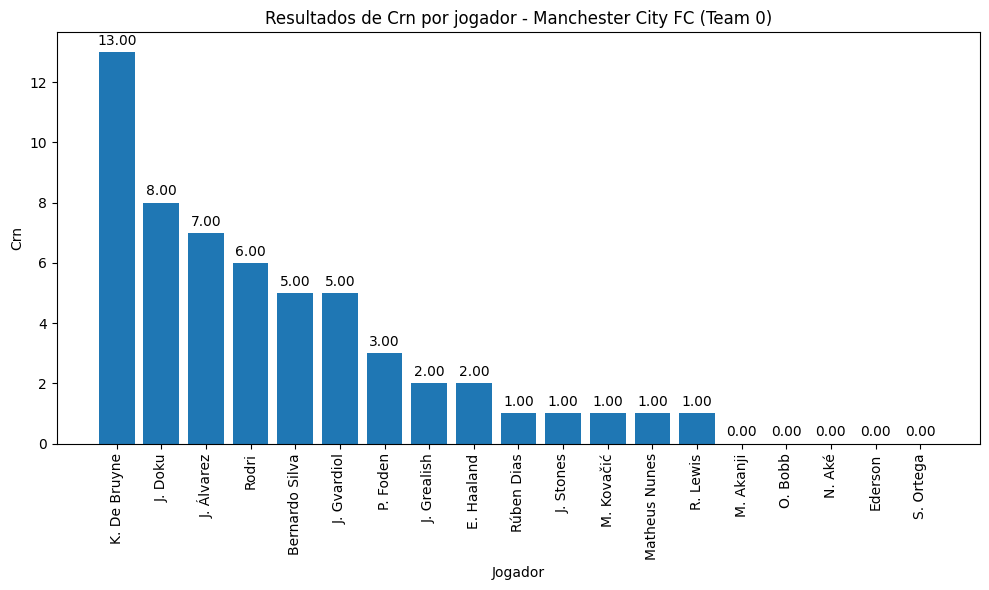

In [45]:
filter_and_sort_df(df_grouped, "Manchester City FC", 0)

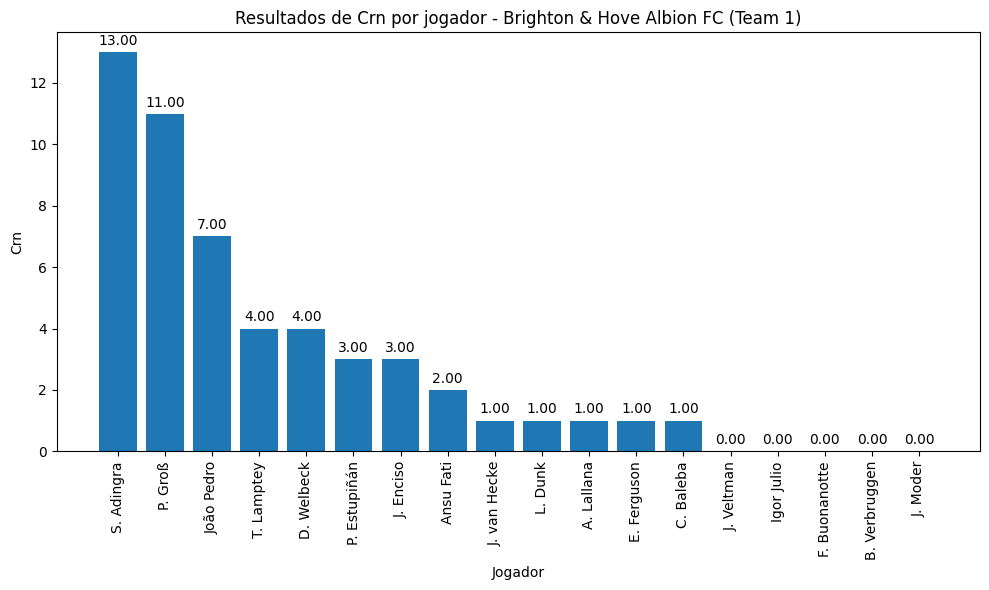

In [46]:
filter_and_sort_df(df_grouped, "Brighton & Hove Albion FC", 1)

In [78]:
df_grouped2 = df_grouped[["Player", "Team", "Crn"]]

mean_corners_per_game = dados_players.groupby(['Player', 'Team'])['Crn'].mean()

df_grouped2['Crn_Score'] = df_grouped2.apply(lambda row: mean_corners_per_game[(row['Player'], row['Team'])], axis=1)


/tmp/ipykernel_7946/3593699371.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grouped2['Crn_Score'] = df_grouped2.apply(lambda row: mean_corners_per_game[(row['Player'], row['Team'])], axis=1)


In [89]:
def print_corners_mean(player, team):
    df_play = df_grouped2[(df_grouped2["Player"] == player) & (df_grouped2["Team"] == team)]
    if team == 1:
        print(f'{player} conquistou em média {df_play["Crn_Score"].sum()} escanteios por jogo em casa')
    else:
        print(f'{player} conquistou em média {df_play["Crn_Score"].sum()} escanteios por fora de casa')

In [91]:
print_corners_mean("K. De Bruyne", 0)

K. De Bruyne conquistou em média 2.6 escanteios por fora de casa


In [96]:
print_corners_mean("D. Welbeck", 1)
print_corners_mean("J. van Hecke", 1)
print_corners_mean("P. Groß", 1)
print_corners_mean("A. Lallana", 1)
print_corners_mean("C. Baleba", 1)
print_corners_mean("J. Veltman", 1)
print_corners_mean("L. Dunk", 1)
print_corners_mean("J. Moder", 1)
print_corners_mean("João Pedro", 1)
print_corners_mean("V. Barco", 1)
print_corners_mean("J. Steele", 1)

print("\n")

print_corners_mean("P. Foden", 0)
print_corners_mean("Rodri", 0)
print_corners_mean("M. Akanji", 0)
print_corners_mean("Ederson M. Kovačić", 0)
print_corners_mean("J. Gvardiol", 0)
print_corners_mean("Bernardo Silva", 0)
print_corners_mean("J. Álvarez", 0)
print_corners_mean("N. Aké", 0)
print_corners_mean("K. Walker", 0)
print_corners_mean("K. De Bruyne", 0)
print_corners_mean("Matheus Nunes", 0)


D. Welbeck conquistou em média 0.6666666666666666 escanteios por jogo em casa
J. van Hecke conquistou em média 0.1111111111111111 escanteios por jogo em casa
P. Groß conquistou em média 1.2222222222222223 escanteios por jogo em casa
A. Lallana conquistou em média 0.14285714285714285 escanteios por jogo em casa
C. Baleba conquistou em média 0.14285714285714285 escanteios por jogo em casa
J. Veltman conquistou em média 0.0 escanteios por jogo em casa
L. Dunk conquistou em média 0.14285714285714285 escanteios por jogo em casa
J. Moder conquistou em média 0.0 escanteios por jogo em casa
João Pedro conquistou em média 1.0 escanteios por jogo em casa
V. Barco conquistou em média 0.0 escanteios por jogo em casa
J. Steele conquistou em média 0.0 escanteios por jogo em casa


P. Foden conquistou em média 0.375 escanteios por fora de casa
Rodri conquistou em média 0.75 escanteios por fora de casa
M. Akanji conquistou em média 0.0 escanteios por fora de casa
Ederson M. Kovačić conquistou em média